In [270]:
# TODO: Find time complexities and exact time of solution methods

In [2]:
%matplotlib inline
# import matplotlib as mpl
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt
import itertools

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 10,
    # # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

import numpy as np
from numpy.random import default_rng
rng = default_rng(257) # seed

# Task 1

In [272]:
# define matrix sizes
N = 500
p = 30

In [273]:
X = rng.random((N, p)) # design matrix
w = rng.random(p) # weights

In [274]:
y = X @ w + (rng.normal(0, 1, N))

In [275]:
# plt.scatter(y, X)

## Closed Form

In [276]:
w_closed = np.linalg.inv(X.T @ X) @ X.T @ y
# print(w_closed)

In [277]:
y_closed = X @ w_closed
# print('y_closed', y_closed)

In [3]:
fig_closed, ax_closed = plt.subplots(1, 2, figsize=(12, 5))
ax_closed[0].scatter(y, y_closed)
ax_closed[0].set(xlabel='True Target', ylabel='Prediction')
ax_closed[1].scatter(w, w_closed)
ax_closed[1].set(xlabel='True Weights', ylabel='Estimated Weights')

NameError: name 'y' is not defined

In [279]:
fig_closed.savefig('report/Figures/closed.pdf')

## Gradient Descent

In [280]:
w_gd = rng.random(p) # initialise gd weights
learning_rate_gd = 1e-4
maxIter_gd = 500
iterError_gd = np.zeros(maxIter_gd+1)

iterError_gd[0] = (y - X@w_gd).T @ (y - X@w_gd)

for i in range(maxIter_gd):
    error_diff_gd = -2 * X.T @ (y - X@w_gd) # derivative of error
    w_gd -= learning_rate_gd * error_diff_gd # weight update
    iterError_gd[i+1] = (y - X@w_gd).T @ (y - X@w_gd) # error

y_gd = X @ w_gd

[Text(0, 0.5, 'Estimated Weights'), Text(0.5, 0, 'True Weights')]

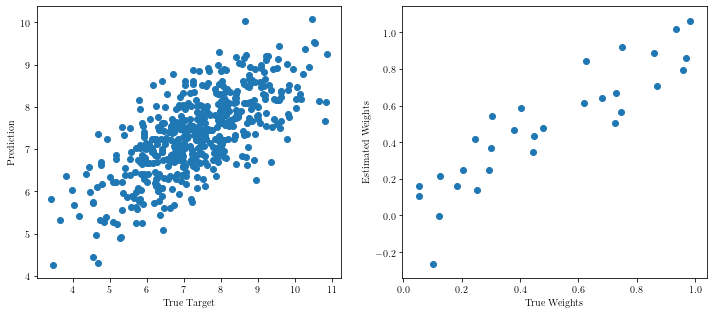

In [281]:
fig_gd_results, ax_gd_results = plt.subplots(1, 2, figsize=(12, 5))
ax_gd_results[0].scatter(y, y_closed)
ax_gd_results[0].set(xlabel='True Target', ylabel='Prediction')
ax_gd_results[1].scatter(w, w_closed)
ax_gd_results[1].set(xlabel='True Weights', ylabel='Estimated Weights')

In [282]:
fig_gd_results.savefig('report/Figures/gd_results.pdf')

Text(0.5, 1.0, 'Gradient Descent on Linear Regression')

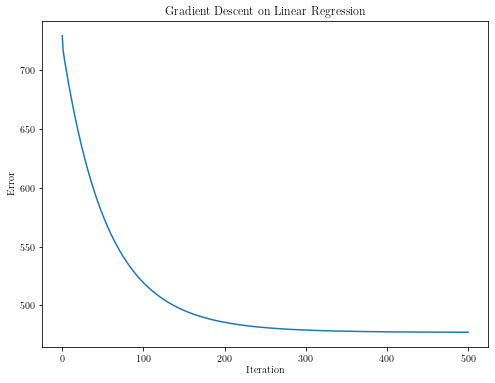

In [283]:
fig_gd_iterError = plt.figure(figsize=(8,6))
plt.plot(iterError_gd)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Gradient Descent on Linear Regression')

In [284]:
fig_gd_iterError.savefig('report/Figures/gd_iterError.pdf')

## Stochastic Gradient Descent

In [285]:
w_sgd = rng.random(p)
learning_rate_sgd = 0.005
maxIter_sgd = 5000
iterError_sgd = np.zeros(maxIter_sgd+1)

iterError_sgd[0] = (y - X@w_sgd).T @ (y - X@w_sgd)

for i in range(maxIter_sgd):
    j = rng.integers(low=0, high=y.shape[0])
    x_iter = X[j] # random sample of X
    y_iter = y[j] # random sample of Y

    error_diff_sgd = -(y_iter - w_sgd.T@x_iter) * x_iter # derivative of error
    w_sgd -= learning_rate_sgd * error_diff_sgd # sgd update
    iterError_sgd[i+1] = (y - X@w_sgd).T @ (y - X@w_sgd) # error
    
y_sgd = X @ w_sgd

[Text(0, 0.5, 'Estimated Weights'), Text(0.5, 0, 'True Weights')]

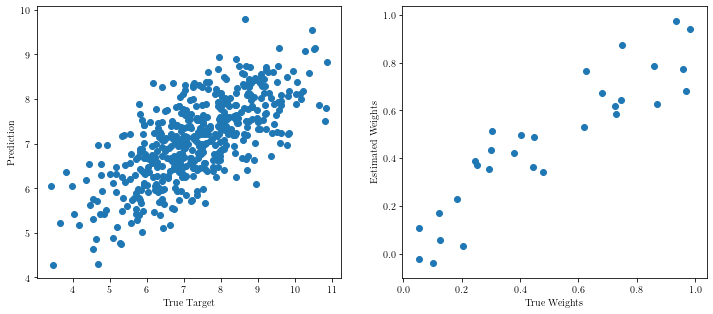

In [286]:
fig_sgd_results, ax_sgd_results = plt.subplots(1, 2, figsize=(12, 5))
ax_sgd_results[0].scatter(y, y_sgd)
ax_sgd_results[0].set(xlabel='True Target', ylabel='Prediction')
ax_sgd_results[1].scatter(w, w_sgd)
ax_sgd_results[1].set(xlabel='True Weights', ylabel='Estimated Weights')

In [287]:
fig_sgd_results.savefig('report/Figures/sgd_results.pdf')

Text(0.5, 1.0, 'Stochastic Gradient Descent on Linear Regression')

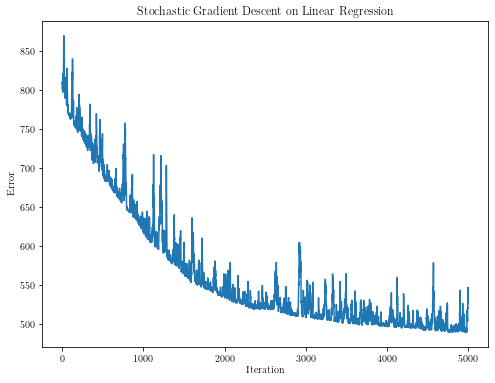

In [288]:
fig_sgd_iterError = plt.figure(figsize=(8,6))
plt.plot(iterError_sgd)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Stochastic Gradient Descent on Linear Regression')

In [289]:
fig_sgd_iterError.savefig('report/Figures/sgd_iterError.pdf')

## Mini-batch Gradient Descent

In [290]:
w_mbgd = rng.random(p)
learning_rate_mbgd = 1e-4
maxIter_mbgd = 3000
iterError_mbgd = np.zeros(maxIter_mbgd)
batch_size = 64

for i in range(maxIter_mbgd):
    j = rng.integers(low=0, high=y.shape[0], size=batch_size)
    x_iter = X[j] # random sample of X
    y_iter = y[j] # random sample of Y

    error_diff_mbgd = -2 * x_iter.T @ (y_iter - x_iter @ w_mbgd) # derivative of error
    w_mbgd -= learning_rate_mbgd * error_diff_mbgd # sgd update
    iterError_mbgd[i] = (y - X@w_mbgd).T @ (y - X@w_mbgd) # error
    
y_mbgd = X @ w_mbgd

Text(0.5, 1.0, 'Mini-batch Gradient Descent on Linear Regression')

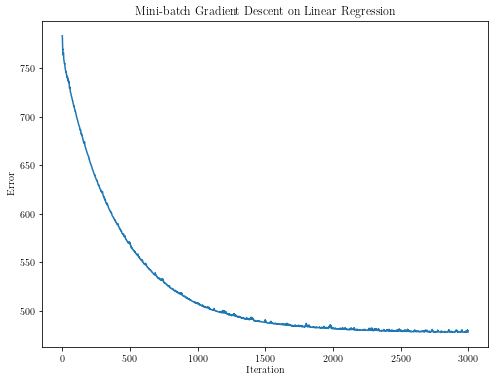

In [291]:
fig_mbgd_iterError = plt.figure(figsize=(8,6))
plt.plot(iterError_mbgd)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Mini-batch Gradient Descent on Linear Regression')

In [292]:
fig_mbgd_iterError.savefig('report/Figures/mbgd_iterError.pdf')

# Task 2
Recursive Least Squares

In [336]:
p = 30
X = rng.random((N, p)) # design matrix
w = rng.random(p) # weights
y = X @ w + (rng.normal(0, 1, N))

w_rls = np.zeros((p, 1))
lambda_rls = 0.8
delta = 1
P = delta * np.identity(p)
iterError_rls = np.zeros(y.shape[0])

for i, (x_n, y_n) in enumerate(zip(X, y)):
    x_n = x_n.reshape(-1, 1)

    error = y_n - x_n.T @ w_rls
    k_n = P @ x_n * 1/(lambda_rls + x_n.T @ P @ x_n)
    P = ((1/lambda_rls)*P - k_n @ x_n.T @ ((1/lambda_rls)*P))
    w_rls += k_n * error
    iterError_rls[i] = y_n - x_n.T @ w_rls

iterError_rls = np.abs(iterError_rls)
    
w_rls = w_rls.flatten()
y_rls = X @ w_rls
y_rls = y_rls.flatten()

In [338]:
p = 300
X = rng.random((N, p)) # design matrix
w = rng.random(p) # weights
y = X @ w + (rng.normal(0, 1, N))

w_rls = np.zeros((p, 1))
lambda_rls = 0.98
delta = 1
P = delta * np.identity(p)
iterError_rls1 = np.zeros(y.shape[0])

for i, (x_n, y_n) in enumerate(zip(X, y)):
    x_n = x_n.reshape(-1, 1)

    error = y_n - x_n.T @ w_rls
    k_n = P @ x_n * 1/(lambda_rls + x_n.T @ P @ x_n)
    P = ((1/lambda_rls)*P - k_n @ x_n.T @ ((1/lambda_rls)*P))
    w_rls += k_n * error
    iterError_rls1[i] = y_n - x_n.T @ w_rls

iterError_rls1 = np.abs(iterError_rls1)
    
w_rls = w_rls.flatten()
y_rls = X @ w_rls
y_rls = y_rls.flatten()

In [339]:
p = 500
X = rng.random((N, p)) # design matrix
w = rng.random(p) # weights
y = X @ w + (rng.normal(0, 1, N))

w_rls = np.zeros((p, 1))
lambda_rls = 0.98
delta = 1
P = delta * np.identity(p)
iterError_rls2 = np.zeros(y.shape[0])

for i, (x_n, y_n) in enumerate(zip(X, y)):
    x_n = x_n.reshape(-1, 1)

    error = y_n - x_n.T @ w_rls
    k_n = P @ x_n * 1/(lambda_rls + x_n.T @ P @ x_n)
    P = ((1/lambda_rls)*P - k_n @ x_n.T @ ((1/lambda_rls)*P))
    w_rls += k_n * error
    iterError_rls2[i] = y_n - x_n.T @ w_rls

iterError_rls2 = np.abs(iterError_rls2)
    
w_rls = w_rls.flatten()
y_rls = X @ w_rls
y_rls = y_rls.flatten()

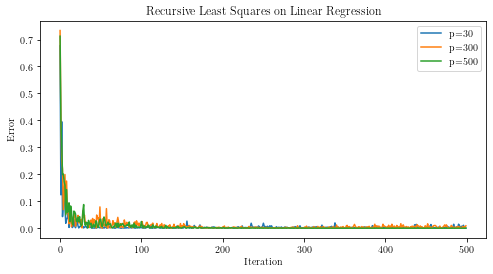

In [345]:
fig_rls_iterError = plt.figure(figsize=(8,4))
plt.plot(iterError_rls, label='p=30')
plt.plot(iterError_rls1, label='p=300')
plt.plot(iterError_rls2, label='p=500')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Recursive Least Squares on Linear Regression')
plt.legend()

In [346]:
fig_rls_iterError.savefig('report/Figures/rls_iterError.pdf')

[Text(0, 0.5, 'Estimated Weights'), Text(0.5, 0, 'True Weights')]

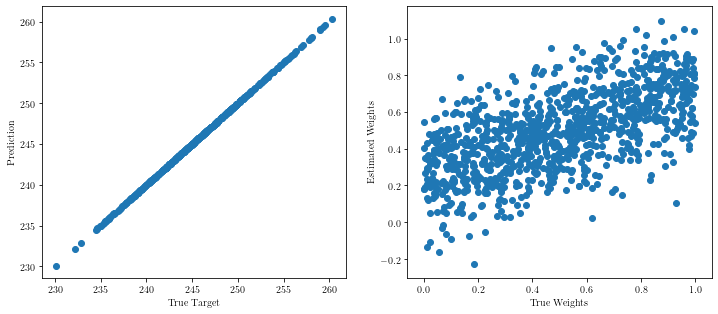

In [298]:
fig_rls_results, ax_rls_results = plt.subplots(1, 2, figsize=(12, 5))
ax_rls_results[0].scatter(y, y_rls)
ax_rls_results[0].set(xlabel='True Target', ylabel='Prediction')
ax_rls_results[1].scatter(w, w_rls)
ax_rls_results[1].set(xlabel='True Weights', ylabel='Estimated Weights')

In [299]:
fig_rls_results.savefig('report/Figures/rls_results.pdf')

In [300]:
df_y = pd.DataFrame(data={'y': y, 'y_closed': y_closed, 'y_gd': y_gd, 'y_sgd': y_sgd, 'y_mbgd': y_mbgd, 'y_rls': y_rls})
y_corr = df_y.corr(method='pearson')
y_corr

,y,y_closed,y_gd,y_sgd,y_mbgd,y_rls
y,1.000000,-0.069741,-0.071047,-0.070648,-0.070378,0.999997
y_closed,-0.069741,1.000000,0.999854,0.987167,0.999290,-0.069660
y_gd,-0.071047,0.999854,1.000000,0.988109,0.999422,-0.070968
y_sgd,-0.070648,0.987167,0.988109,1.000000,0.987526,-0.070561
y_mbgd,-0.070378,0.999290,0.999422,0.987526,1.000000,-0.070302
y_rls,0.999997,-0.069660,-0.070968,-0.070561,-0.070302,1.000000


In [301]:
df_w = pd.DataFrame(data={'w': w, 'w_closed': w_closed, 'w_gd': w_gd, 'w_sgd': w_sgd, 'w_mbgd': w_mbgd, 'w_rls': w_rls})
w_corr = df_w.corr(method='pearson')
w_corr

ValueError: arrays must all be same length

In [246]:
df = pd.concat((y_corr['y'], w_corr['w']), axis=1)
df

,y,w
y,1.000000,NaN
y_closed,0.704550,NaN
y_gd,0.704451,NaN
y_sgd,0.695540,NaN
y_mbgd,0.704058,NaN
y_rls,0.704521,NaN
w,NaN,1.000000
w_closed,NaN,0.901110
w_gd,NaN,0.901576
w_sgd,NaN,0.911628


In [247]:
# df.to_csv('corr.csv')

In [248]:
df_corr = pd.read_csv('corr.csv', index_col=0)
df_corr

,y,w
Ground Truth,1.000000,1.000000
Closed Form,0.704550,0.901110
GD,0.704451,0.901576
SGD,0.697499,0.852364
MBGD,0.704231,0.895733
RLS,0.704521,0.901942


In [249]:
print(df_corr.to_latex(caption='Table of correlation against ground truth on synthetic data.', label="tab:task1_corr"))

\begin{table}
\centering
\caption{Table of correlation against ground truth on synthetic data.}
\label{tab:task1_corr}
\begin{tabular}{lrr}
\toprule
{} &         y &         w \\
\midrule
Ground Truth &  1.000000 &  1.000000 \\
Closed Form  &  0.704550 &  0.901110 \\
GD           &  0.704451 &  0.901576 \\
SGD          &  0.697499 &  0.852364 \\
MBGD         &  0.704231 &  0.895733 \\
RLS          &  0.704521 &  0.901942 \\
\bottomrule
\end{tabular}
\end{table}

